In [73]:
import pandas as pd
import calendar
from pandas import Series

df = pd.read_csv('data.csv')

Eliminando atributos

In [74]:
del df['description']
del df['title']
del df['price_period']
del df['l6']
del df['l5']
del df['id']

Discriminando data

In [75]:
df = df.loc[df['l2'] == 'Capital Federal']
df = df.loc[df['operation_type'] == 'Venta']
df = df.loc[df['property_type'] == 'Departamento']
df = df.loc[df['currency'] == 'USD']
# hay datos de 2020 y 2021
# nos quedamos con los datos del año 2020
df = df.loc[df['created_on'] < '2021-01-01 00:00:00']
del df['property_type']
df.head()

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,operation_type
43,Propiedad,2020-12-26,9999-12-31,2020-12-26,-34.643163,-58.494823,Argentina,Capital Federal,Villa Luro,NaN,2.0,NaN,1.0,NaN,NaN,100000.0,USD,Venta
68,Propiedad,2020-12-26,9999-12-31,2020-12-26,-34.579185,-58.434970,Argentina,Capital Federal,Palermo,Palermo Hollywood,NaN,NaN,1.0,33.0,29.0,105000.0,USD,Venta
69,Propiedad,2020-12-26,2021-02-11,2020-12-26,-34.556279,-58.462507,Argentina,Capital Federal,Belgrano,NaN,1.0,NaN,1.0,40.0,NaN,110000.0,USD,Venta
72,Propiedad,2020-12-26,2020-12-29,2020-12-26,-34.592565,-58.445352,Argentina,Capital Federal,Villa Crespo,NaN,1.0,NaN,1.0,27.0,25.0,84900.0,USD,Venta
75,Propiedad,2020-12-26,2021-04-10,2020-12-26,-34.606791,-58.469843,Argentina,Capital Federal,Villa General Mitre,NaN,NaN,NaN,1.0,27.0,24.0,68000.0,USD,Venta


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86228 entries, 43 to 999980
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ad_type          86228 non-null  object 
 1   start_date       86228 non-null  object 
 2   end_date         86228 non-null  object 
 3   created_on       86228 non-null  object 
 4   lat              79585 non-null  float64
 5   lon              79569 non-null  float64
 6   l1               86228 non-null  object 
 7   l2               86228 non-null  object 
 8   l3               85809 non-null  object 
 9   l4               4267 non-null   object 
 10  rooms            83177 non-null  float64
 11  bedrooms         69860 non-null  float64
 12  bathrooms        82104 non-null  float64
 13  surface_total    64488 non-null  float64
 14  surface_covered  64764 non-null  float64
 15  price            86228 non-null  float64
 16  currency         86228 non-null  object 
 17  operation_

Transform & clean

In [77]:
def divide_by_one_thounsans(x):
    return x / 1000


df['created_on'] = pd.to_datetime(df['created_on'])
df['surface_total'].fillna((df['surface_total'].mean()), inplace=True)
df['surface_covered'].fillna((df['surface_covered'].mean()), inplace=True)
df['bedrooms'].fillna((df['bedrooms'].mean()), inplace=True)
df['rooms'].fillna((df['rooms'].mean()), inplace=True)
df['price'] = df['price'].apply(divide_by_one_thounsans)


<AxesSubplot:>

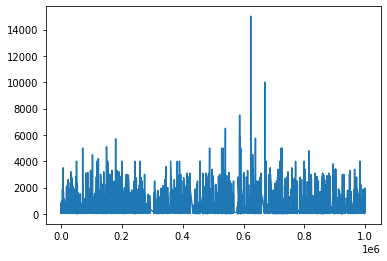

In [78]:
#import matplotlib.pyplot as plt
df['price'].plot()

<AxesSubplot:>

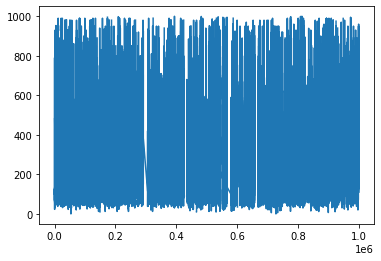

In [79]:
df['price'] = df['price'].loc[df['price'] < 1000]
df['price'].plot()

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

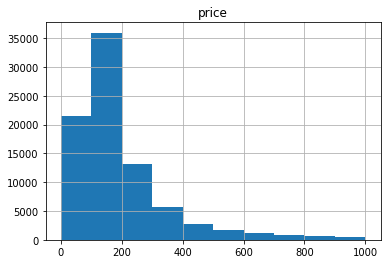

In [80]:
df.hist(column='price')

<AxesSubplot:>

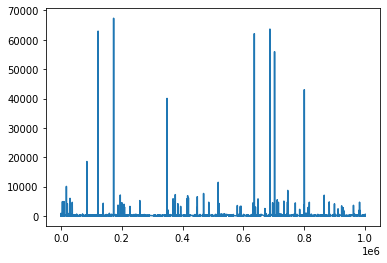

In [81]:
df['surface_covered'].plot()

<AxesSubplot:>

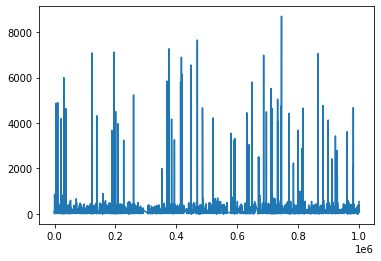

In [82]:
df['surface_covered'] = df['surface_covered'].loc[df['surface_covered'] < 10000]
df['surface_covered'].plot()

<AxesSubplot:>

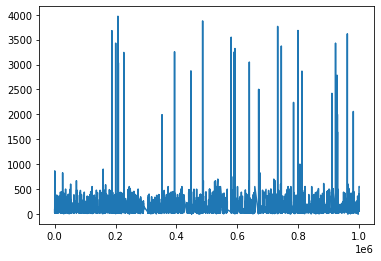

In [83]:
df['surface_covered'] = df['surface_covered'].loc[df['surface_covered'] < 4000]
df['surface_covered'].plot()

<AxesSubplot:>

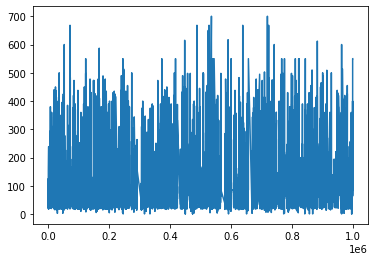

In [84]:
df['surface_covered'] = df['surface_covered'].loc[df['surface_covered'] < 750]
df['surface_covered'].plot()

<AxesSubplot:>

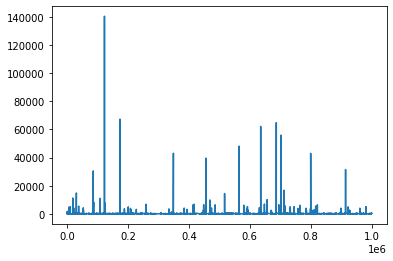

In [85]:
df['surface_total'].plot()

<AxesSubplot:>

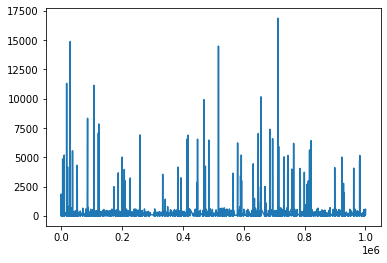

In [86]:
df['surface_total'] = df['surface_total'].loc[df['surface_total'] < 20000]
df['surface_total'].plot()

<AxesSubplot:xlabel='surface_covered'>

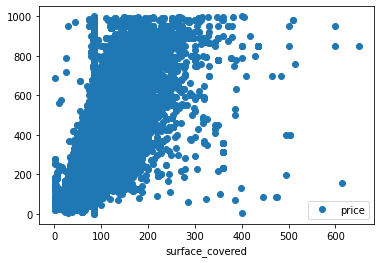

In [87]:
df.plot(x='surface_covered', y='price', style='o')

<AxesSubplot:xlabel='surface_total'>

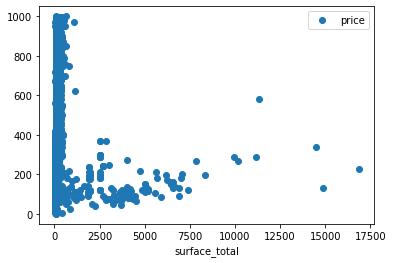

In [88]:
df.plot(x='surface_total', y='price', style='o')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86228 entries, 43 to 999980
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ad_type          86228 non-null  object        
 1   start_date       86228 non-null  object        
 2   end_date         86228 non-null  object        
 3   created_on       86228 non-null  datetime64[ns]
 4   lat              79585 non-null  float64       
 5   lon              79569 non-null  float64       
 6   l1               86228 non-null  object        
 7   l2               86228 non-null  object        
 8   l3               85809 non-null  object        
 9   l4               4267 non-null   object        
 10  rooms            86228 non-null  float64       
 11  bedrooms         86228 non-null  float64       
 12  bathrooms        82104 non-null  float64       
 13  surface_total    86216 non-null  float64       
 14  surface_covered  86140 non-null  flo

### ¿Cómo influye la comuna en el precio por m2?

In [90]:
# corren antes de "Transform & clean"
df['surface_total'].fillna((df['surface_total']), inplace=True)
df['price'].fillna((df['price']), inplace=True)

df["price_usd_per_m2"] = df["price"] / df["surface_total"]

In [91]:
def getComunaByBarrio(x):
    comuna1 = ['Retiro','San Nicolás','Puerto Madero','San Telmo','Montserrat', 'Constitución']
    comuna2 = ['Recoleta']
    comuna3 = ['Balvanera','San Cristóbal']
    comuna4 = ['La Boca', 'Barracas', 'Parque Patricios', 'Nueva Pompeya']
    comuna5 = ['Almagro', 'Boedo']
    comuna6 = ['Caballito']
    comuna7 = ['Flores','Parque Chacabuco']
    comuna8 = ['Villa Soldati', 'Villa Riachuelo', 'Villa Lugano']
    comuna9 = ['Liniers', 'Mataderos', 'Parque Avellaneda']
    comuna10 = ['Villa Real', 'Monte Castro', 'Versalles', 'Floresta','Vélez Sarsfield','Villa Luro']
    comuna11 = ['Villa General Mitre', 'Villa Devoto', 'Villa del Parque', 'Villa Santa Rita']
    comuna12 = ['Coghlan', 'Saavedra', 'Villa Urquiza','Villa Pueyrredón']
    comuna13 = ['Núñez', 'Belgrano', 'Colegiales']
    comuna14 = ['Palermo']
    comuna15 = ['Chacarita', 'Villa Crespo', 'La Paternal','Villa Ortúzar', 'Agronomía', 'Parque Chas']
    
    if x in comuna1:
        return 'COMUNA 1'
    elif x in comuna2:
        return 'COMUNA 2'
    elif x in comuna3:
        return 'COMUNA 3'
    elif x in comuna4:
        return 'COMUNA 4'
    elif x in comuna5:
        return 'COMUNA 5'
    elif x in comuna6:
        return 'COMUNA 6'
    elif x in comuna7:
        return 'COMUNA 7'
    elif x in comuna8:
        return 'COMUNA 8'
    elif x in comuna9:
        return 'COMUNA 9'
    elif x in comuna10:
        return 'COMUNA 10'
    elif x in comuna11:
        return 'COMUNA 11'
    elif x in comuna12:
        return 'COMUNA 12'
    elif x in comuna13:
        return 'COMUNA 13'
    elif x in comuna14:
        return 'COMUNA 14'
    elif x in comuna15:
        return 'COMUNA 15'
    
      

In [92]:
df['COMUNA'] = df['l3'].apply(getComunaByBarrio)

In [93]:
df['COMUNA'].describe

<bound method NDFrame.describe of 43        COMUNA 10
68        COMUNA 14
69        COMUNA 13
72        COMUNA 15
75        COMUNA 11
            ...    
999975    COMUNA 14
999976    COMUNA 14
999977    COMUNA 13
999979    COMUNA 13
999980    COMUNA 13
Name: COMUNA, Length: 86228, dtype: object>

In [94]:
import matplotlib.pyplot as plt
def get_top_places(df, num, cheapest):
    return df.groupby(['COMUNA'])['price_usd_per_m2'].mean().sort_values(ascending=cheapest).head(num)
    
def plot_top_places(df, num, cheapest,colour,title):
    graph = get_top_places(df, num, cheapest).sort_values().plot.barh(figsize=(15,5),color=colour,fontsize=15)
    graph.set_title(title, fontsize=20)
    graph.set_ylabel("Comuna", fontsize=18)
    graph.set_xlabel("USD/m2", fontsize=18)
    plt.show()

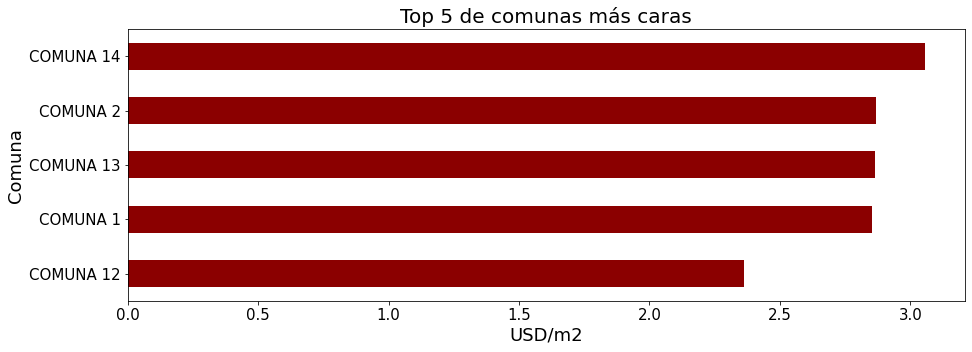

In [95]:
plot_top_places(df,5, False,'darkred',"Top 5 de comunas más caras")

/home/cgonzalez/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1557: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  return ax.barh(x, y, w, left=start, log=log, **kwds)


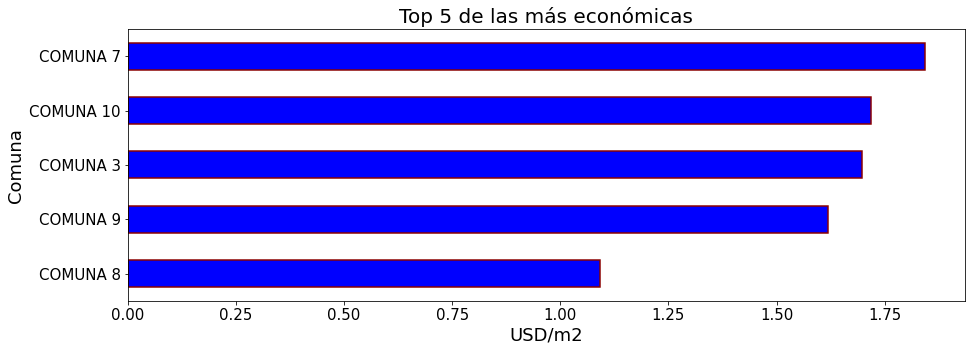

In [96]:
top5_cheap_CABA = get_top_places(df,5, True)
graph4 = top5_cheap_CABA.sort_values().plot.barh(figsize=(15,5),color='blue',edgecolor='darkred',lineWidth = 1.5,fontsize=15)
graph4.set_title("Top 5 de las más económicas", fontsize=20)
graph4.set_ylabel("Comuna", fontsize=18)
graph4.set_xlabel("USD/m2", fontsize=18)
plt.show()

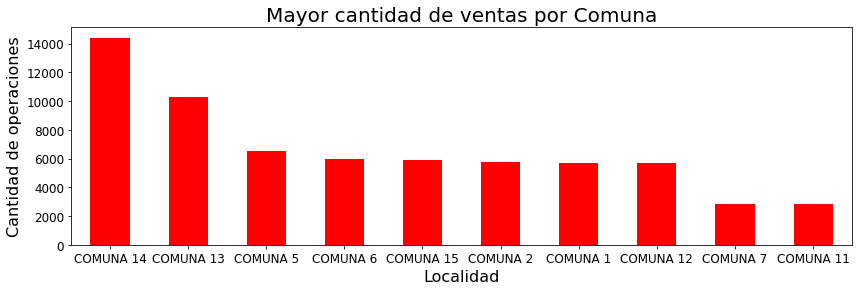

In [97]:
# Mayor cantidad de ventas por comuna
df['COMUNA'].value_counts().head(10).plot(kind='bar',rot=0, figsize=(14,4), color='red' ,fontsize=12);
plt.title('Mayor cantidad de ventas por Comuna', fontsize=20);
plt.xlabel('Localidad', fontsize=16);
plt.ylabel('Cantidad de operaciones', fontsize=16);

In [98]:
# comuna 14 = ['Palermo']
# comuna 13 = ['Núñez', 'Belgrano', 'Colegiales']
# comuna 5 = ['Almagro', 'Boedo']

In [99]:
#Analizamos la cantidad de ventas para cada mes en todo el año

df['created_on'] = pd.to_datetime(df['created_on'])
df['year'] = df['created_on'].map(lambda x:x.year)
df['month'] = df['created_on'].map(lambda x:x.month)
df['day'] = df['created_on'].map(lambda x:x.day)

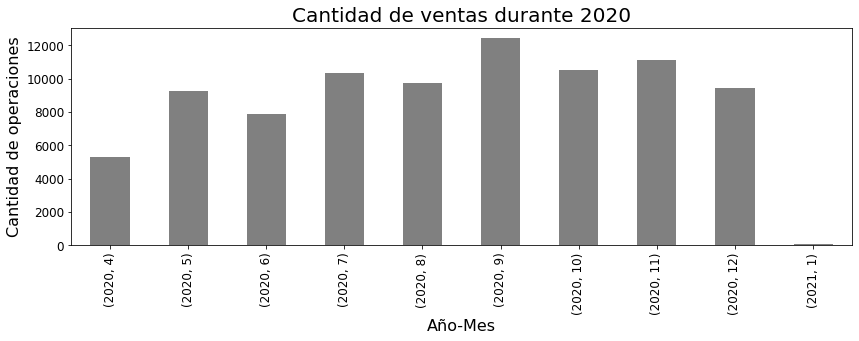

In [100]:
df.groupby(['year','month']).count()['created_on'].plot(kind='bar', rot = 90, figsize=(14,4), color='grey' ,fontsize=12)
plt.title('Cantidad de ventas durante 2020', fontsize=20);
plt.xlabel('Año-Mes', fontsize=16);
plt.ylabel('Cantidad de operaciones', fontsize=16);

In [101]:
df['price'].describe()

count    83803.000000
mean       196.441107
std        154.270659
min          0.000000
25%         99.000000
50%        145.000000
75%        230.000000
max        999.999000
Name: price, dtype: float64

In [102]:
df['price'] = df['price'].loc[df['price'] > 1]

In [103]:
df['price'].describe()

count    83801.000000
mean       196.445795
std        154.269515
min          6.000000
25%         99.000000
50%        145.000000
75%        230.000000
max        999.999000
Name: price, dtype: float64

<AxesSubplot:>

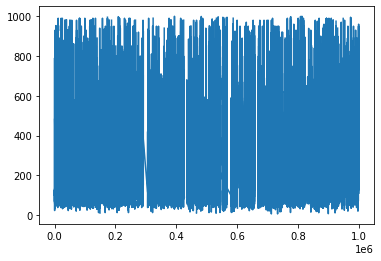

In [104]:
df['price'].plot()

In [105]:
df['price'].describe()

count    83801.000000
mean       196.445795
std        154.269515
min          6.000000
25%         99.000000
50%        145.000000
75%        230.000000
max        999.999000
Name: price, dtype: float64

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

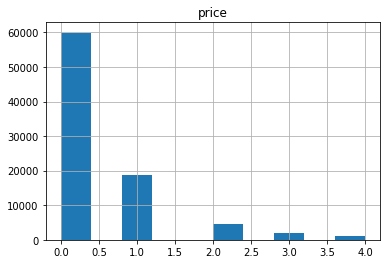

In [109]:
import math

def map_price(x):
    isNan = math.isnan(x)
    x = 0 if isNan else int(x)
    if x < 200:
        return 0
    if x < 400:
        return 1
    if x < 600:
        return 2
    if x < 800:
        return 3
    return 4


df['price'] = df['price'].map(map_price)
df.hist(column='price')

In [ ]:
df.to_csv('cleaned_data.csv', index=False)